<a href="https://colab.research.google.com/github/HilmyMhiii/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

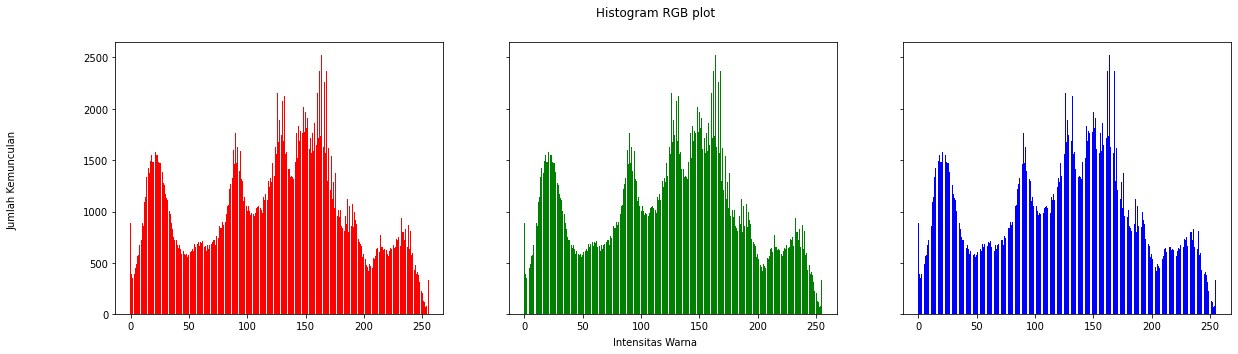

In [19]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

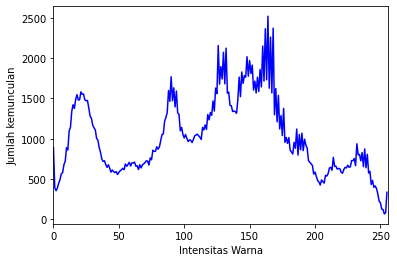

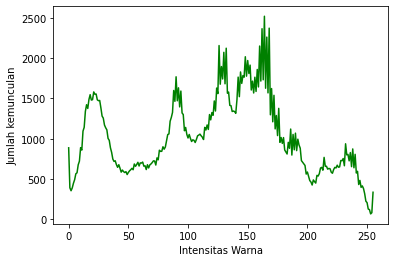

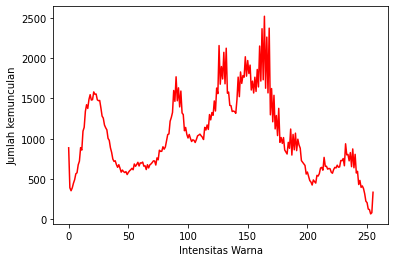

In [20]:
# Membuat Histogram Image
colors = ("b","g","r")
channel_ids = (0, 1, 2)

# Membuat Histogram Plot
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

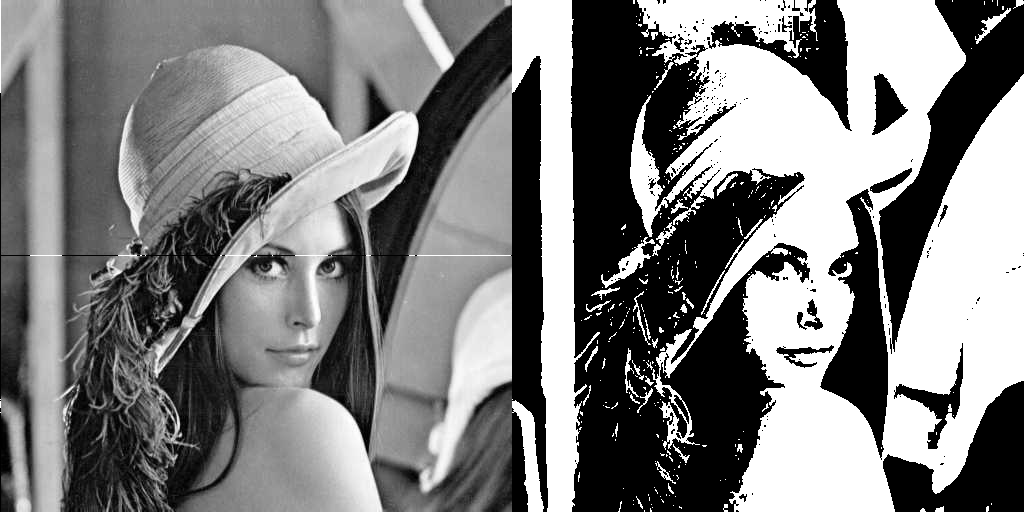

In [23]:
lena_original = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = cv.cvtColor(lena_original, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = warnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
img_16jt = cv.cvtColor(img_16jt, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16jt, img_8))
cv2_imshow(final_frame)

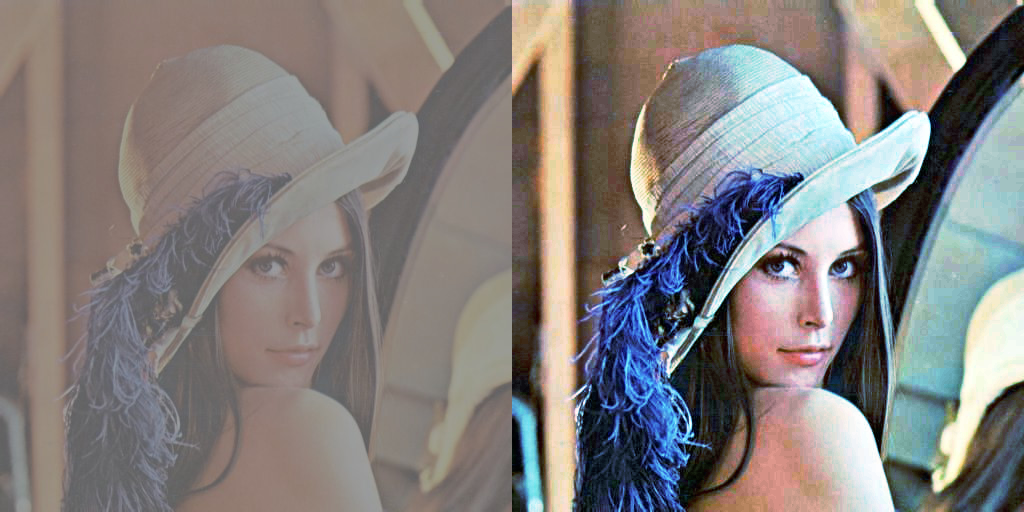

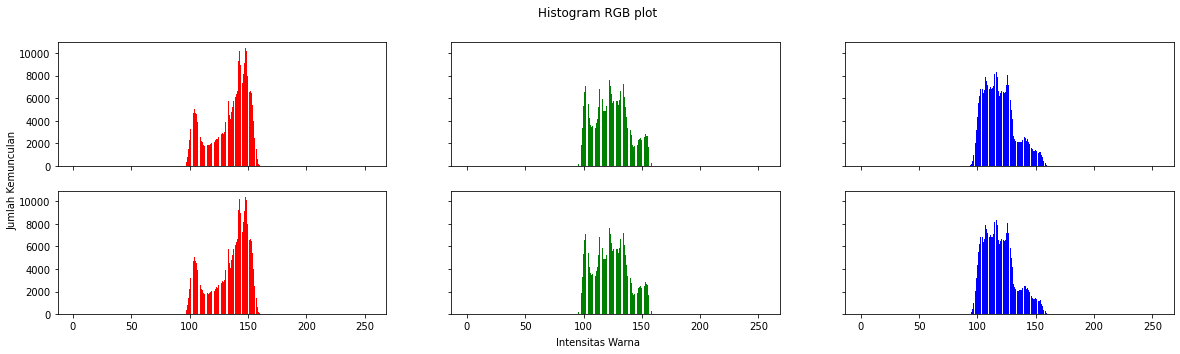

In [7]:
#histogram equalization using library
img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

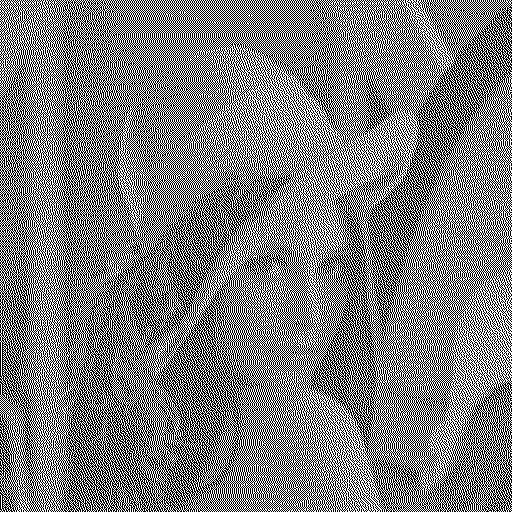

In [18]:
from PIL import Image
import cv2
import numpy as np

imageConvert = Image.open('/content/drive/MyDrive/PCVK/lena_lc.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK/lena_lc.jpg')


Image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/PCVK/lena_lc.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value
        x=255
        y=255

        if(x) : NewNumber=255
        elif (NewNumber<0):NewNumber =0
        GrayImage[y,x+1] = NewNumber

        if(x>0 and y) : NewNumber=255
        elif (NewNumber<0):NewNumber =0
        GrayImage[y+1,x-1] = NewNumber

        if(y) : NewNumber=255
        elif (NewNumber<0):NewNumber =0
        GrayImage[y+1,x] = NewNumber

        if(y) : NewNumber=255
        elif (NewNumber<0):NewNumber =0
        GrayImage[y+1,x+1] = NewNumber

cv2.imwrite('/content/drive/MyDrive/PCVK/lena_lc.jpg', GrayImage)
cv2_imshow(GrayImage)